### Import my libraries & load excel doc

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

company_data = pd.read_excel('../my_files/features.xlsx')
sic_list = pd.read_csv('../my_files/SIC list.csv')

In [2]:
company_data

,index,name,ni_company_house_match,company_number,present_company_number,company_house_name,ch_prev_names,present_ch_prev_names,ch_type,present_ch_type,...,ind_Wearables,ind_Web Apps,ind_Web Design,ind_Web Development,ind_Web Hosting,ind_Wellness,ind_Wireless,ind_Women's,ind_eSports,ind_iOS
0,1,Axial3D,Partial,NI618621,True,AXIAL MEDICAL PRINTING LIMITED,NaN,False,Private limited Company,True,...,0,0,0,0,0,0,0,0,0,0
1,2,Re-Vana Therapeutics,Yes,NI638333,True,RE-VANA THERAPEUTICS LTD,"[{'previous_name': 'REVANA OCULAR LTD', 'perio...",True,Private limited Company,True,...,0,0,0,0,0,0,0,0,0,0
2,3,Diaceutics,Partial,NI657874,True,DIACEUTICS GROUP LIMITED,NaN,False,Private limited Company,True,...,0,0,0,0,0,0,0,0,0,0
3,4,Cloudsmith,Yes,NI653568,True,CLOUDSMITH LTD,"[{'previous_name': 'CLOUDSMITH X LTD', 'period...",True,Private limited Company,True,...,0,0,0,0,0,0,0,0,0,0
4,5,Kraydel,Yes,NI638874,True,KRAYDEL LIMITED,NaN,False,Private limited Company,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,510,McAlister Armstrong & Partners,Yes,NI033603,True,MCALISTER ARMSTRONG & PARTNERS LTD,NaN,False,Private limited Company,True,...,0,0,0,0,0,0,0,0,0,0
491,511,Peace Tech,Partial,NI626055,True,AARDVARK TECH LTD,NaN,False,Private limited Company,True,...,0,0,0,0,0,0,0,0,0,0
492,512,Vbaylive Auction,Partial,NI652459,True,AUCTION ROOMS TYRONE LTD,NaN,False,Private limited Company,True,...,0,0,0,0,0,0,0,0,0,0
493,513,Life Communications,Partial,NI017893,True,ABBEY (LIFE AND PENSIONS) BROKERS LIMITED,NaN,False,NaN,False,...,0,0,0,0,0,0,0,0,0,0


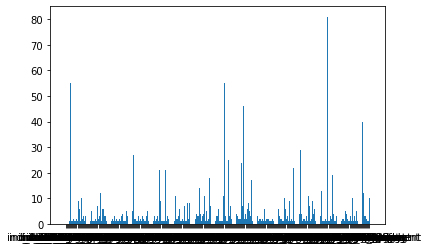

In [3]:
industries = []
for col in company_data.columns:
    if col[:4] == "ind_":
        industries.append(col)

industries_tots = []
for industry in industries:
    total = company_data[industry].sum()
    industries_tots.append(total)

industry_bars = plt.bar(industries,industries_tots)

plt.show()

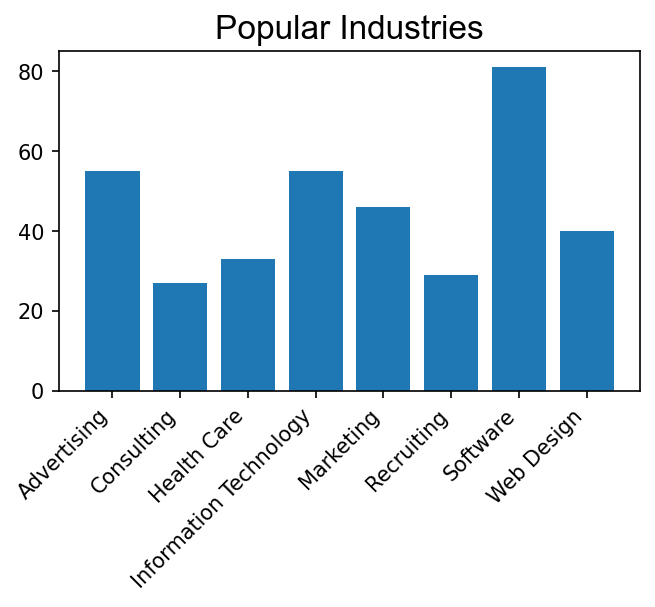

In [4]:
# only plotting popular industries
pop_industries_tots = []
pop_industries = []
for industry in industries:
    total = company_data[industry].sum()
    if total > 25:
        pop_industries.append(industry[4:])
        pop_industries_tots.append(total)
     
plt.figure(figsize=(5,3),dpi=150)
plt.xticks(rotation=45, ha='right')
pop_industry_bars = plt.bar(pop_industries,pop_industries_tots)

plt.title('Popular Industries', fontdict={'fontname':'Arial', 'fontsize': 16})  

plt.show()


## SIC
A graph on the Industry Coding

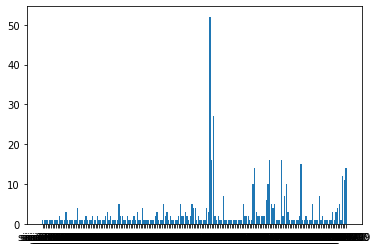

In [5]:
sics = []
for col in company_data.columns:
    if col[:4] == "sic_":
        sics.append(col)

sics_tots = []
for sic in sics:
    total = company_data[sic].sum()
    sics_tots.append(total)

industry_bars = plt.bar(sics,sics_tots)

plt.show()

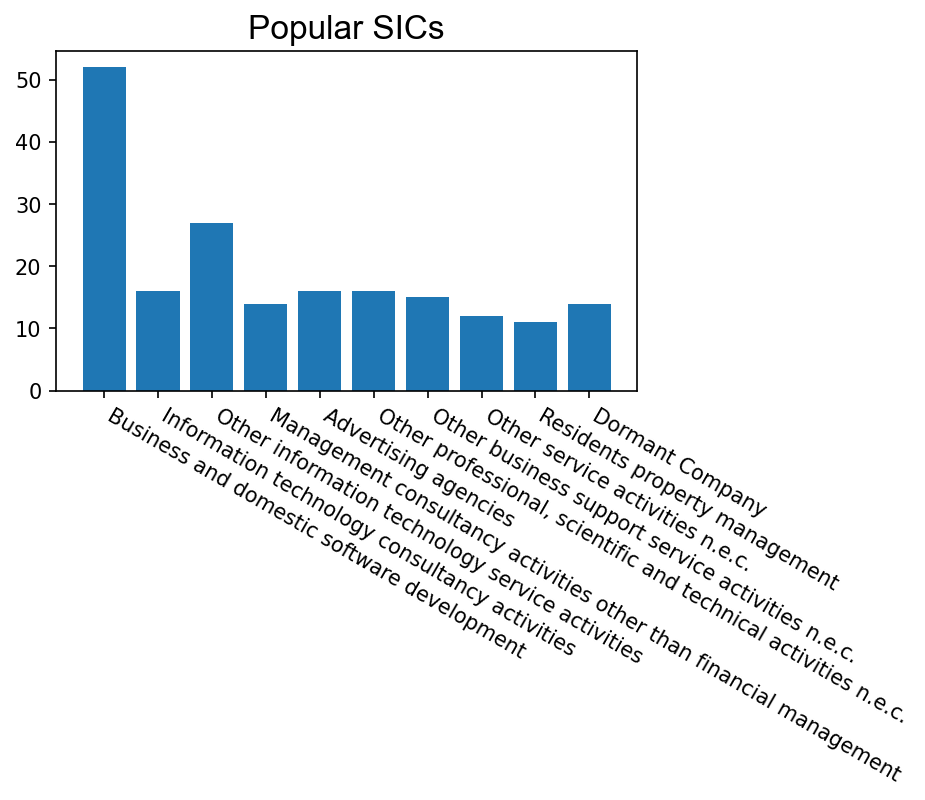

In [17]:
# only plotting popular sics
def find_sic_name(code,sic_list):
    sic_index = sic_list[sic_list['SIC Code']==int(code)].index.values
    name = (sic_list['Description'].iloc[sic_index].values)
    return name[0]

pop_sics_tots = []
pop_sics = []
for sic in sics:
    total = company_data[sic].sum()
    if total > 10:
        name = find_sic_name(sic[4:],sic_list)
        pop_sics.append(name)
        pop_sics_tots.append(total)


plt.figure(figsize=(5,3),dpi=150)
plt.xticks(rotation=-30, ha='left')
pop_sics_bars = plt.bar(pop_sics,pop_sics_tots)

plt.title('Popular SICs', fontdict={'fontname':'Arial', 'fontsize': 16})  
#plt.xticks.setrotation(55)


plt.show()

### INVESTORS

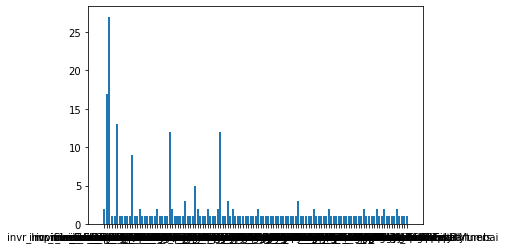

In [49]:
investors = []
for col in company_data.columns:
    if col[:5] == "invr_":
        investors.append(col)

investor_tots = []
for investor in investors:
    total = company_data[investor].sum()
    investor_tots.append(total)

industry_bars = plt.bar(investors,investor_tots)

plt.show()

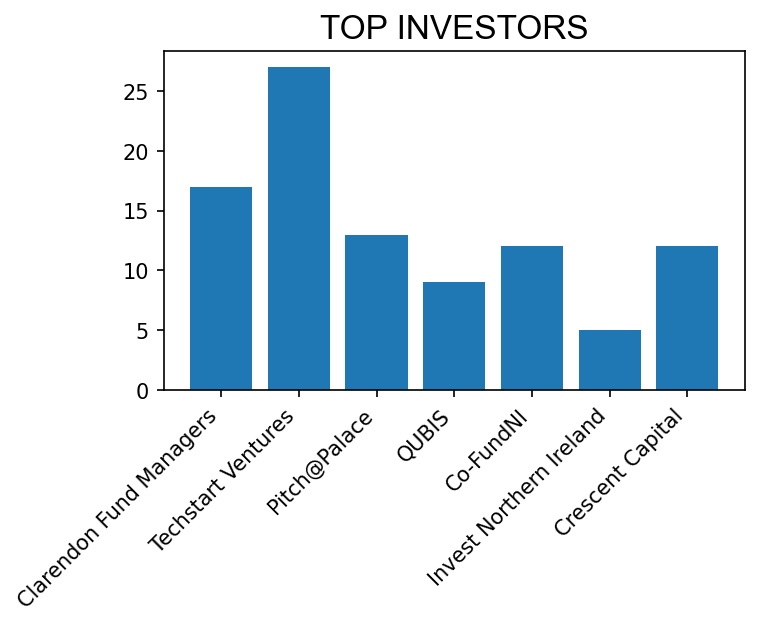

In [54]:
# only plotting popular industries
pop_investors_tots = []
pop_investors = []
for investor in investors:
    total = company_data[investor].sum()
    if total > 4:
        pop_investors.append(investor[5:])
        pop_investors_tots.append(total)
     
plt.figure(figsize=(5,3),dpi=150)
plt.xticks(rotation=45, ha='right')
pop_industry_bars = plt.bar(pop_investors,pop_investors_tots)

plt.title('TOP INVESTORS', fontdict={'fontname':'Arial', 'fontsize': 16})  

plt.show()

### FUNDING ROUND TYPES

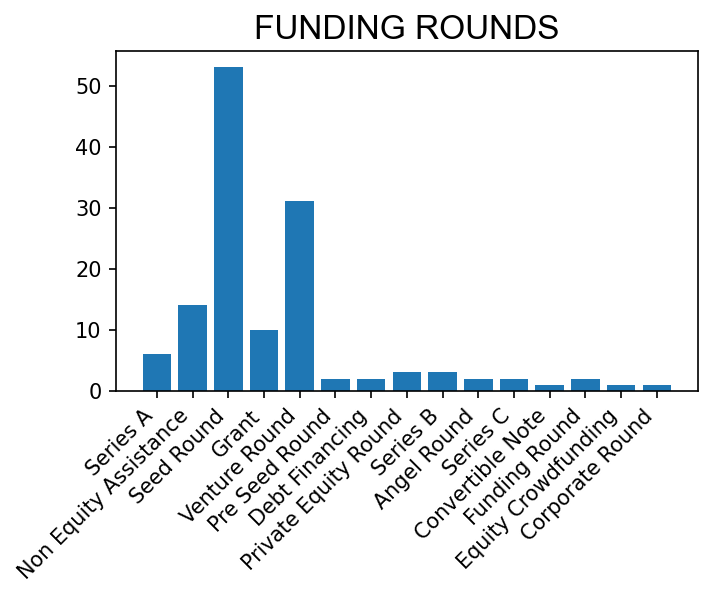

In [61]:
funding_rounds = []
for col in company_data.columns:
    if col[:3] == "fr_":
        funding_rounds.append(col)
        
funding_round_names = []
funding_round_tots = []
for funding_round in funding_rounds:
    total = company_data[funding_round].sum()
    funding_round_tots.append(total)
    funding_round_names.append(funding_round[3:])

plt.figure(figsize=(5,3),dpi=150)
plt.xticks(rotation=45, ha='right')
funding_bars = plt.bar(funding_round_names,funding_round_tots)
plt.title('FUNDING ROUNDS', fontdict={'fontname':'Arial', 'fontsize': 16})  

plt.show()

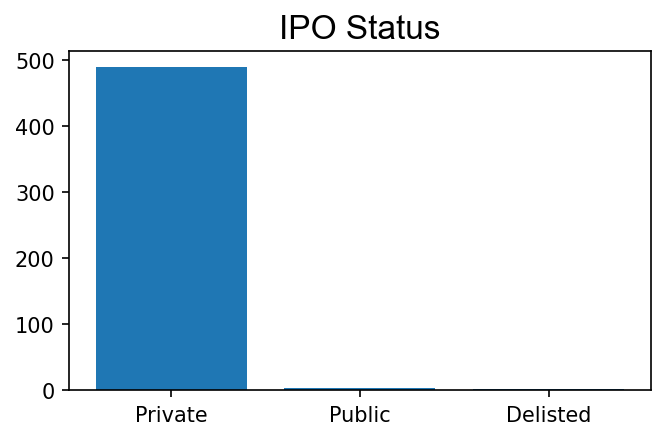

In [47]:
ipo_status = company_data['IPO Status ']
ipo_status_type = ipo_status.unique()
ipo_status_count = []

for ipo in ipo_status_type:
    this_ipo = ipo_status[ipo_status==ipo]
    ipo_count = this_ipo.count()
    ipo_status_count.append(ipo_count)
    
plt.figure(figsize=(5,3),dpi=150)
#plt.xticks(rotation=45, ha='right')
ipo_bars = plt.bar(ipo_status_type,ipo_status_count)

plt.title('IPO Status', fontdict={'fontname':'Arial', 'fontsize': 16})  

plt.show()

# ACCOUNTS...
I'll try filter out only those that have iXBRL info for starters...